## Regularization 

<ul>
<li>A model will have a low accuracy if it is overfitting. </li>
<li>Overfitting occurs when model is trying too hard to capture the noise (samples that don't represent true pattern)
    in your training dataset.</li>
<li>When model is more flexible, it is prone to overfitting</li>
<li>Regularization shrinks the coefficients (parameter or slops) towards zero to discourages a more complex or flexible model, so as to avoid the risk of overfitting</li>
    <li>Ridge and Lasso are two options </li>
    <li>Regularization strength is provided by parameter <b>alpha</b></li>
</ul>    

In [15]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings(action='ignore')

In [16]:
X_train = pd.DataFrame({'sqft':[1000,2000,3000,4000,5000]})
y_train = pd.Series([60,65,70,80,85])
X_test = pd.DataFrame({'sqft':[2200,1000,4200,2100] })
y_test = pd.Series([65,45,65,60])

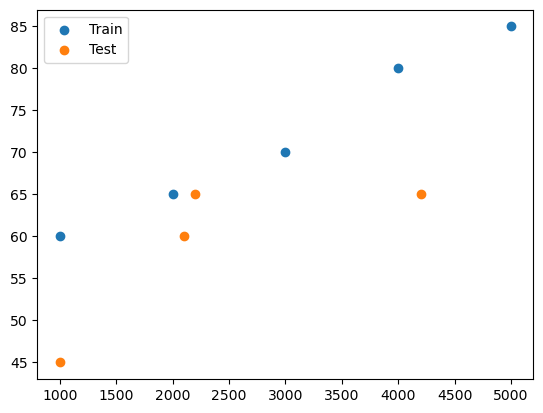

In [17]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
lr_model.coef_

array([0.0065])

In [21]:
y_pred = lr_model.predict(X_train)

In [22]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.5000000000000029
RMSE     :  1.2247448713915903
R2 Score :  0.9825581395348837


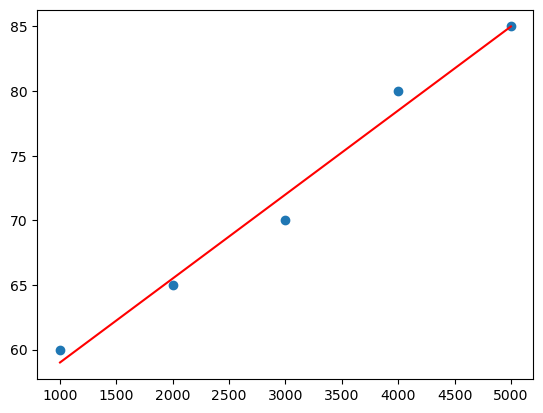

In [23]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [24]:
y_pred = lr_model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.02562500000003
RMSE     :  10.678278185175737
R2 Score :  -0.6971255813953494


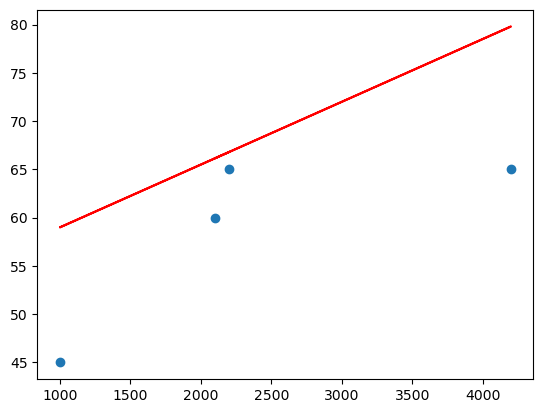

In [26]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

## Ridge Regression (L2)

In [27]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [28]:
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)

In [47]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train,y_train)

Ridge(alpha=10.0)

In [48]:
ridge.coef_

array([0.00649999])

In [31]:
y_pred = ridge.predict(X_train)

In [32]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.5000000000211222
RMSE     :  1.2247448714002123
R2 Score :  0.9825581395346381


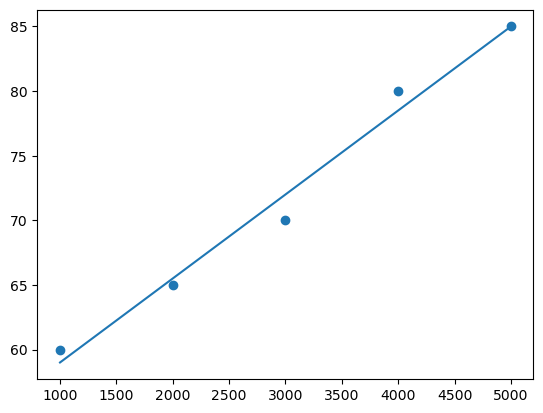

In [33]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [34]:
y_pred = ridge.predict(X_test)

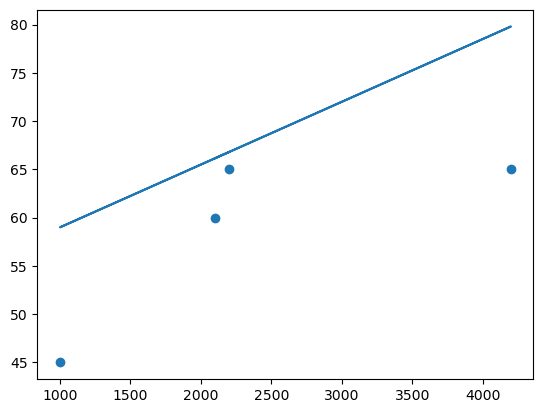

In [35]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [36]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.02565297437917
RMSE     :  10.678279495048777
R2 Score :  -0.6971259977582016


## LassoCV

In [37]:
from sklearn.linear_model import LassoCV

In [49]:
lasso = LassoCV(cv = 3, alphas = [.25, .5, 1, 2,4,6, 10, 20])
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.25, 0.5, 1, 2, 4, 6, 10, 20], cv=3)

In [ ]:
lasso.coef_

In [40]:
lasso.alpha_

6.0

In [41]:
y_pred = lasso.predict(X_train)

In [42]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.500018
RMSE     :  1.2247522198387721
R2 Score :  0.9825579302325581


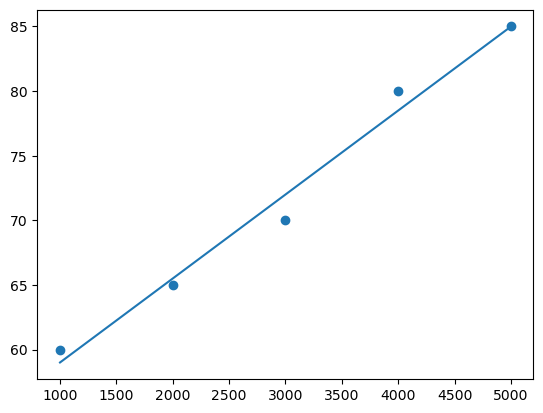

In [43]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [44]:
y_pred = lasso.predict(X_test)

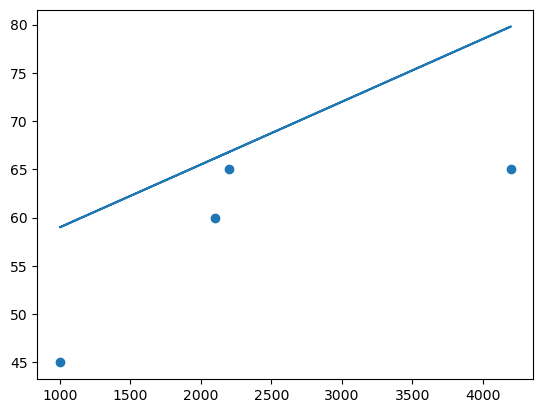

In [45]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [46]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.05146300250003
RMSE     :  10.679487956007069
R2 Score :  -0.697510147013954
